In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from IPython.display import display
import os
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn import preprocessing,cross_validation,ensemble,metrics,svm,grid_search,decomposition,feature_selection,linear_model
import seaborn as sns
from functools import partial
from datetime import datetime
from sklearn.cross_validation import  train_test_split

In [89]:
#set current working directory 
cwd = os.getcwd()
os.chdir("C:/Users/mukul")

#read test and train datasets
Numerai_train  = pd.read_csv("./Desktop/numerai_training_data.csv")

Numerai_train.info()
Numerai_train.describe()
Numerai_train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96320 entries, 0 to 96319
Data columns (total 22 columns):
feature1     96320 non-null float64
feature2     96320 non-null float64
feature3     96320 non-null float64
feature4     96320 non-null float64
feature5     96320 non-null float64
feature6     96320 non-null float64
feature7     96320 non-null float64
feature8     96320 non-null float64
feature9     96320 non-null float64
feature10    96320 non-null float64
feature11    96320 non-null float64
feature12    96320 non-null float64
feature13    96320 non-null float64
feature14    96320 non-null float64
feature15    96320 non-null float64
feature16    96320 non-null float64
feature17    96320 non-null float64
feature18    96320 non-null float64
feature19    96320 non-null float64
feature20    96320 non-null float64
feature21    96320 non-null float64
target       96320 non-null int64
dtypes: float64(21), int64(1)
memory usage: 16.2 MB


,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,target
0,0.581007,0.908596,0.766110,0.844650,0.247000,0.600018,0.827638,0.726782,0.596622,0.383684,...,0.083463,0.537761,0.613012,0.672179,0.422369,0.727817,0.884887,0.267128,0.352174,1
1,0.050758,0.905095,0.966358,0.991736,0.637117,0.956871,0.804695,0.994215,0.967192,0.083801,...,0.054114,0.066266,0.715163,0.796705,0.826976,0.734355,0.805943,0.832481,0.659629,1
2,0.425571,0.691507,0.920220,0.594960,0.591689,0.525516,0.862749,0.549405,0.225714,0.333259,...,0.648824,0.407148,0.383214,0.478281,0.240681,0.937534,0.967276,0.483772,0.671841,0
3,0.458899,0.210681,0.118947,0.362672,0.243417,0.729953,0.010813,0.061358,0.879345,0.740620,...,0.474311,0.387113,0.763792,0.437354,0.876841,0.015405,0.006289,0.522826,0.564926,0
4,0.922149,0.414926,0.530944,0.656192,0.756348,0.678726,0.000730,0.400667,0.200305,0.854789,...,0.948615,0.972195,0.326792,0.643454,0.450616,0.081692,0.048362,0.456337,0.557026,0
5,0.079134,0.022967,0.249782,0.226950,0.185614,0.288966,0.208857,0.108524,0.644828,0.409030,...,0.083189,0.177080,0.324625,0.436778,0.738932,0.255777,0.249878,0.507851,0.577551,0
6,0.099850,0.655682,0.696653,0.719951,0.221871,0.596171,0.601680,0.644193,0.059886,0.895353,...,0.289252,0.257531,0.637051,0.582870,0.352148,0.409036,0.774827,0.280734,0.384447,1
7,0.736983,0.774114,0.746896,0.557867,0.661183,0.268727,0.375753,0.629554,0.408182,0.213741,...,0.681676,0.530153,0.152600,0.242324,0.380565,0.435312,0.475579,0.768404,0.992844,0
8,0.135431,0.658999,0.120876,0.842477,0.223519,0.545645,0.332043,0.385450,0.400896,0.360478,...,0.149728,0.194408,0.946728,0.715059,0.139190,0.238734,0.171789,0.668993,0.483851,0
9,0.254514,0.293294,0.224329,0.069955,0.275701,0.870825,0.201854,0.297508,0.989613,0.344888,...,0.126001,0.170724,0.366252,0.043868,0.892503,0.144816,0.065174,0.913352,0.907241,0


In [90]:
#read test set
Numerai_test  = pd.read_csv("./Desktop/numerai_tournament_data.csv")
Numerai_test.info()
Numerai_test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135281 entries, 0 to 135280
Data columns (total 22 columns):
t_id         135281 non-null int64
feature1     135281 non-null float64
feature2     135281 non-null float64
feature3     135281 non-null float64
feature4     135281 non-null float64
feature5     135281 non-null float64
feature6     135281 non-null float64
feature7     135281 non-null float64
feature8     135281 non-null float64
feature9     135281 non-null float64
feature10    135281 non-null float64
feature11    135281 non-null float64
feature12    135281 non-null float64
feature13    135281 non-null float64
feature14    135281 non-null float64
feature15    135281 non-null float64
feature16    135281 non-null float64
feature17    135281 non-null float64
feature18    135281 non-null float64
feature19    135281 non-null float64
feature20    135281 non-null float64
feature21    135281 non-null float64
dtypes: float64(21), int64(1)
memory usage: 22.7 MB


(135281, 22)

In [91]:
#check missing no of values for both test and train
def num_missing(x):
  return sum(x.isnull())
Numerai_train.apply(num_missing, axis=0)

feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
target       0
dtype: int64

In [ ]:
def num_missing(x):
  return sum(x.isnull())
Numerai_test.apply(num_missing, axis=0)

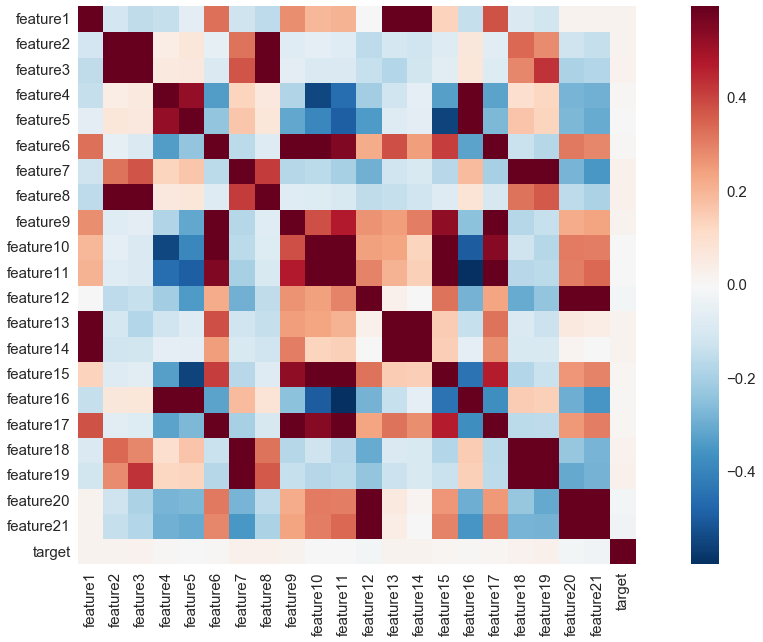

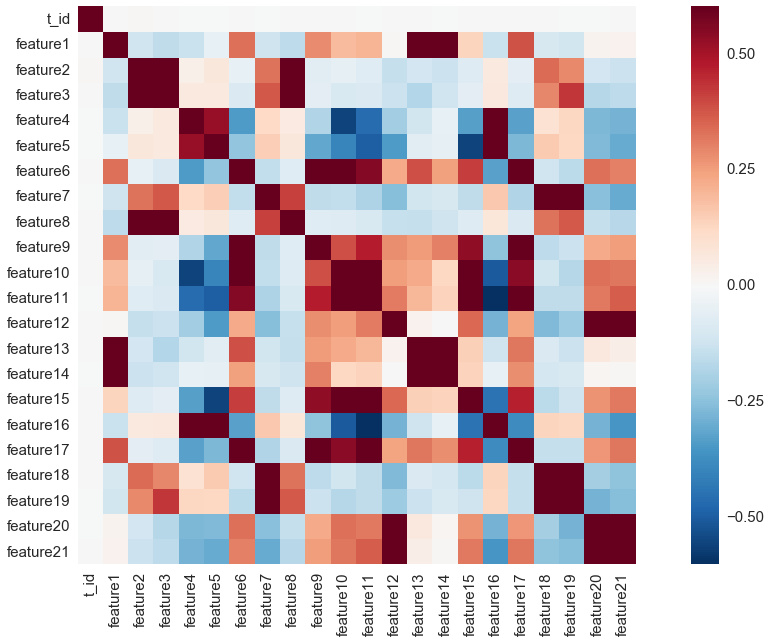

In [92]:
#see corelation in both test and train
d = Numerai_train
corrmat = d.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 10))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.1, square=True)

d = Numerai_test
corrmat = d.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 10))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.1, square=True)

In [ ]:
# only important correlations and not auto-correlations
threshold = 0.7
important_corrs = (corrmat[abs(corrmat) > threshold][corrmat != 1.0]) \
    .unstack().dropna().to_dict()
unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), columns=['attribute pair', 'correlation'])
# sorted by absolute value
unique_important_corrs = unique_important_corrs.ix[
    abs(unique_important_corrs['correlation']).argsort()[::-1]]
unique_important_corrs

In [70]:
#preprocessing and transformation

#Numerai_train.info()
#drop corelated columns and they add noise to the model
train_target = Numerai_train.target
Numerai_train.drop(['target'], axis=1, inplace=True)
Numerai_train.drop(['target','feature13','feature14','feature3','feature4','feature5','feature8','feature10','feature11','feature17','feature2','feature9','feature7','feature6','feature1','feature12','feature20'], axis=1, inplace=True)

In [71]:
test_id=Numerai_test.t_id
Numerai_test.drop(['t_id'], axis=1, inplace=True)

In [68]:
#imputation Numeric variables 
from sklearn.base import TransformerMixin
class DataFrameImputer(TransformerMixin):
    def fit(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [72]:
big_X_imputed_train = DataFrameImputer().fit_transform(Numerai_train)
big_X_imputed_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96320 entries, 0 to 96319
Data columns (total 21 columns):
feature1     96320 non-null float64
feature2     96320 non-null float64
feature3     96320 non-null float64
feature4     96320 non-null float64
feature5     96320 non-null float64
feature6     96320 non-null float64
feature7     96320 non-null float64
feature8     96320 non-null float64
feature9     96320 non-null float64
feature10    96320 non-null float64
feature11    96320 non-null float64
feature12    96320 non-null float64
feature13    96320 non-null float64
feature14    96320 non-null float64
feature15    96320 non-null float64
feature16    96320 non-null float64
feature17    96320 non-null float64
feature18    96320 non-null float64
feature19    96320 non-null float64
feature20    96320 non-null float64
feature21    96320 non-null float64
dtypes: float64(21)
memory usage: 15.4 MB


In [ ]:
#EDA
#univariate analysis - Plots
ncol = 4
nrow = 4
for i in range(nrow):
    fig,axs = plt.subplots(nrows=1,ncols=ncol,sharey=True,figsize=(40, 10))
    cols = Numerai_train.columns[i*ncol:ncol*(i+1)]
    for i in range(len(axs)):
        sns.distplot(Numerai_train[cols[i]], ax=axs[i], hist=False)
        xlabel=cols[i]+" ( R squared = "+str(round(np.corrcoef(Numerai_train, Numerai_train[cols[i]])[0,1],2))+" ) "
        axs[i].set(xlabel=xlabel, ylabel='Density')

In [ ]:
# Bivariate Analysis -Plots
ncol =3
nrow = 6
for i in range(nrow):
    fig,axs = plt.subplots(nrows=1,ncols=ncol,sharey=True,figsize=(40, 10))
    cols =Numerai_train.columns[i*ncol:ncol*(i+1)]
    for i in range(len(axs)):
        axs[i].set(yscale="linear")
        sns.boxplot(x=cols[i],y=Numerai_train.transvalue , data=Numerai_train, ax=axs[i])
        axs[i].set(xlabel=cols[i], ylabel='transvalue')

In [73]:
y = train_target
X_train, X_validation, y_train, y_validation = train_test_split( big_X_imputed_train,y , test_size=0.2, random_state=42)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96320 entries, 59620 to 15795
Data columns (total 21 columns):
feature1     96320 non-null float64
feature2     96320 non-null float64
feature3     96320 non-null float64
feature4     96320 non-null float64
feature5     96320 non-null float64
feature6     96320 non-null float64
feature7     96320 non-null float64
feature8     96320 non-null float64
feature9     96320 non-null float64
feature10    96320 non-null float64
feature11    96320 non-null float64
feature12    96320 non-null float64
feature13    96320 non-null float64
feature14    96320 non-null float64
feature15    96320 non-null float64
feature16    96320 non-null float64
feature17    96320 non-null float64
feature18    96320 non-null float64
feature19    96320 non-null float64
feature20    96320 non-null float64
feature21    96320 non-null float64
dtypes: float64(21)
memory usage: 16.2 MB


In [95]:
#check imp features before moelling         
model = xgb.XGBClassifier()
every_column_exect_y= [col for col in X_train.columns]

best_xgb_model=model.fit(X_train[every_column_exect_y],y_train)

from collections import OrderedDict
OrderedDict(sorted(model.booster().get_fscore().items(), key=lambda t: t[1], reverse=True))              

OrderedDict([('feature1', 50),
             ('feature9', 49),
             ('feature21', 44),
             ('feature19', 42),
             ('feature15', 41),
             ('feature12', 40),
             ('feature8', 39),
             ('feature6', 38),
             ('feature3', 35),
             ('feature13', 34),
             ('feature4', 32),
             ('feature20', 31),
             ('feature10', 30),
             ('feature17', 29),
             ('feature7', 27),
             ('feature11', 27),
             ('feature5', 26),
             ('feature18', 26),
             ('feature16', 23),
             ('feature14', 22),
             ('feature2', 15)])

In [86]:
#Let's remove the less important ones
most_relevant_features= list( dict((k, v) for k, v in model.booster().get_fscore().items() if v >= 10).keys())
print(most_relevant_features)

['feature6', 'feature7', 'feature4', 'feature5', 'feature2', 'feature3', 'feature1', 'feature19', 'feature21', 'feature8', 'feature9', 'feature14', 'feature15', 'feature16', 'feature17', 'feature10', 'feature11', 'feature12', 'feature13', 'feature18', 'feature20']


In [148]:
#grid search for finding best hyperparameters 
from sklearn.grid_search import GridSearchCV

cv_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
ind_params = {'learning_rate': 0.1,'num_class':0,'n_estimators': 1000, 'seed':0,'subsample': 0.8,'colsample_bytree': 0.8, 'objective':'binary:logistic'}

optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                            scoring = 'log_loss', cv = 5, n_jobs = -1) 
#Optimize for accuracy since that is the metric used in the Adult Data Set notation
#x_train.dump('')
optimized_GBM.fit(X_train[most_relevant_features], y_train)

#best_parameters, score, _ = max(optimized_GBM.grid_scores_, key=lambda x: x[1])
 #   print(score)
  #  for param_name in sorted(best_parameters.keys()):
   #     print("%s: %r" % (param_name, best_parameters[param_name]))
                
    

TypeError: __init__() got an unexpected keyword argument 'num_class'

In [108]:
    #check best hyperparameters
    print optimized_GBM.best_params_


AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [78]:
#do a CV of 5 fold with best hyperpapramters on whole training set
xgdmat = xgb.DMatrix(X_train, y_train) 
#xgtrain=xgb.DMatrix(X_train[every_column_exect_y])


#our_params= {'min_child_weight: 0.5, learning_rate 0.01, n_estimators:10, max_depth:4',
 #'min_child_weight: 0.5, learning_rate 0.01, n_estimators:10, max_depth:4'}

our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth':3, 'min_child_weight':3} 
#our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
            # 'objective': 'reg:linear', 'max_depth':3, 'min_child_weight':1} 
# Grid Search CV optimized settings

cv_xgb = xgb.cv(params = our_params, dtrain = xgdmat, num_boost_round = 4000, nfold = 5,
                metrics = ['logloss'], # Make sure you enter metrics inside a list or you may encounter issues!
                early_stopping_rounds = 100) # Look for early stopping that minimizes error


Will train until cv error hasn't decreased in 100 rounds.
Stopping. Best iteration: 41


In [57]:
#check the error rates for train and test and pick best n rounds for depending upon least test 
cv_xgb.tail(5)

,test-logloss-mean,test-logloss-std,train-logloss-mean,train-logloss-std
22,0.692204,0.000416,0.690911,0.000126
23,0.692210,0.000422,0.690865,0.000122
24,0.692204,0.000425,0.690821,0.000121
25,0.692199,0.000449,0.690764,0.000119
26,0.692196,0.000450,0.690713,0.000119


In [79]:
#train the model using xgboost usng best nrounds and hyperparameters derived from grid search and cv
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 'booster':"gbtree",
             'objective': '', 'max_depth':3, 'min_child_weight':3} 
#xgtest=xgb.DMatrix(new_test[every_column_exect_y],missing=np.nan )
#watchlist  = [ (xgdmat,'train'),(xgtest,'test')]
final_gb = xgb.train(our_params,xgdmat,num_boost_round = 41)

In [80]:
#draw feature importance graph
%matplotlib inline
import seaborn as sns
sns.set(font_scale = 1.5)

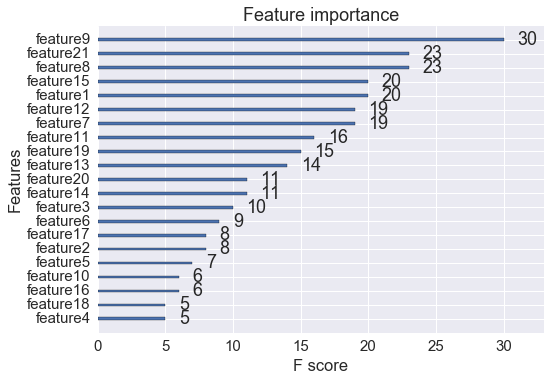

In [81]:
xgb.plot_importance(final_gb)

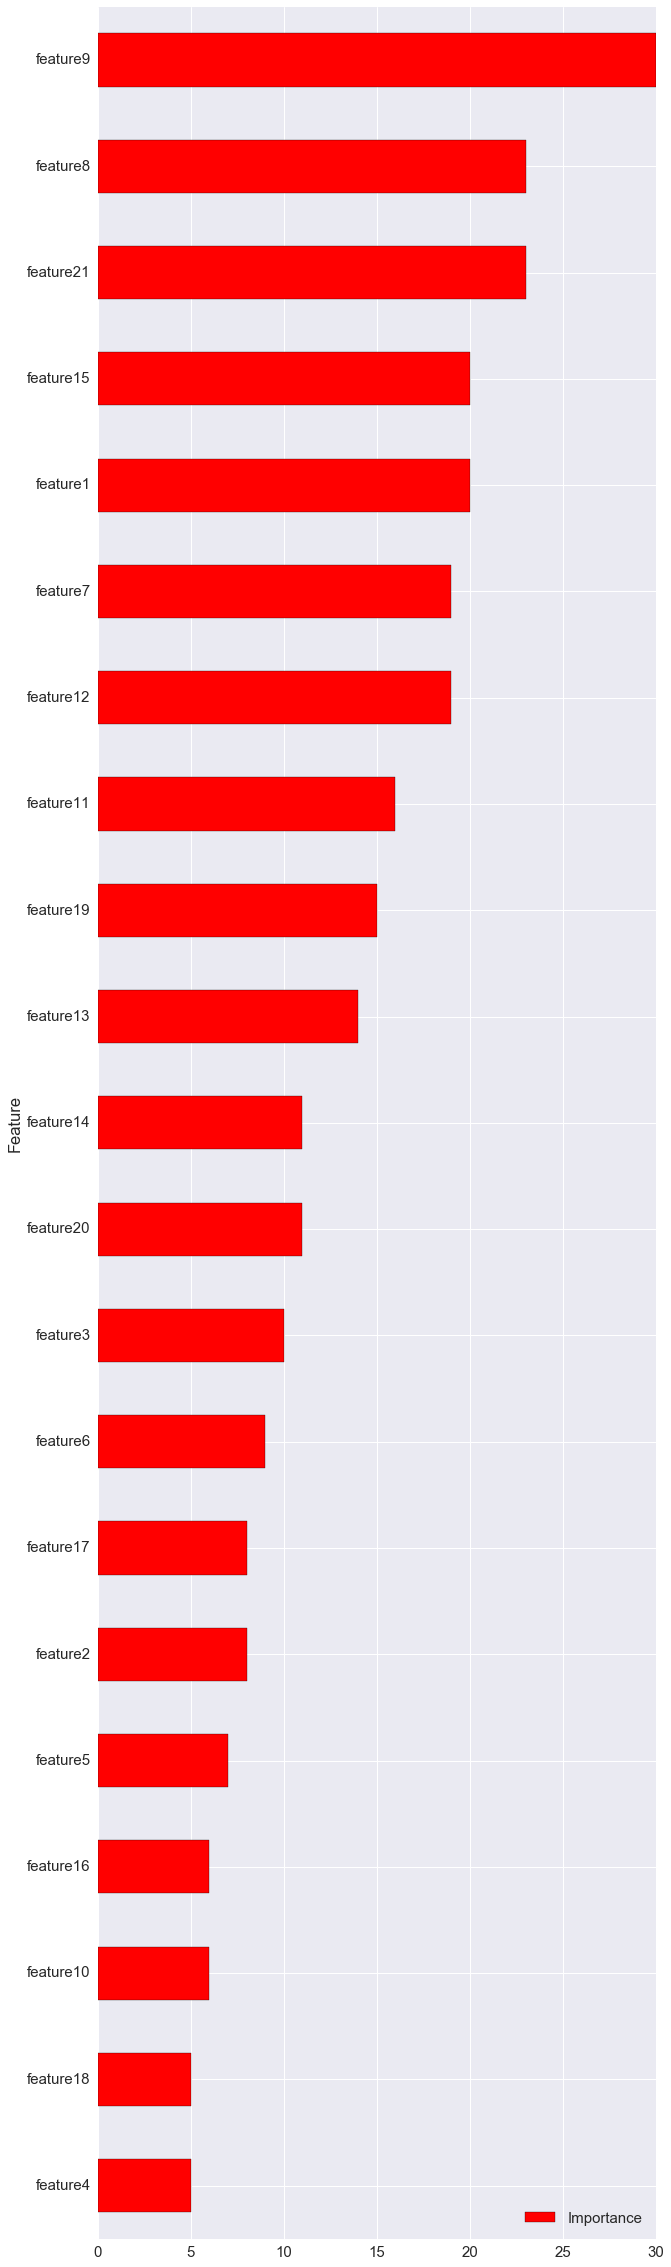

In [82]:
importances = final_gb.get_fscore()
importances
importance_frame = pd.DataFrame({'Importance': list(importances.values()), 'Feature': list(importances.keys())})
importance_frame.sort_values(by = 'Importance', inplace = True)
importance_frame.plot(kind = 'barh', x = 'Feature', figsize = (10,40), color = 'red')

In [85]:
xgval=xgb.DMatrix(Numerai_val[every_column_exect_y],missing=np.nan)
#predict value on actual test set 
y_pred = final_gb.predict(xgval)
y_pred


xgtest=xgb.DMatrix(Numerai_test[every_column_exect_y],missing=np.nan)
#predict value on actual test set 
y_pred = final_gb.predict(xgtest)
y_pred

TypeError: predict() got an unexpected keyword argument 'type'

In [ ]:
from sklearn.metrics import log_loss
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    log_loss = (log_loss(y_true, y_predict))
    # Return the logloss
    return log_loss

In [ ]:
#check performance metric logloss on validation to make sure model is not overfitting on training set and we do a bias variance trade-off 
performance_metric(y_validation,y_pred_val)

In [84]:
df_results= pd.DataFrame()
df_results['t_id']= test_id
df_results['probability']= y_pred
#write prediction to a csv file 
np.savetxt("Numerai_1_full_train.csv", df_results, delimiter=",")
df_results.shape

(135281, 2)